# $$\text{Problema de Schrödinger en Espacio de los momentos}$$
---


## $\text{Joel Acosta}$

## La ecuación de Schrodinger:
*Transformando Fourier ambos lados de la ecuación y acomodando los términos se obtiene:*
### \begin{equation} \left(E_{n}-\frac{k^2}{2}\right)\tilde{\phi}_{n,l}(\bar{k})= \frac{1}{(2\pi)^{3/2}}\int V(\bar{r})\,\phi_{n,l}(\bar{r})\,e^{-i\bar{k}\cdot\bar{r}} d\bar{r} \end{equation}
*Donde usualmente se usa que la transformada de un producto es ~~el producto~~ la convolución de las transformadas para reescribir la expresión:*
### \begin{equation}\left(E_{n}-\frac{k^2}{2}\right)\tilde{\phi}_{n,l}(\bar{k})=\int \tilde{\phi}_{n,l}(\bar{u}-\bar{k})\, \tilde{V}(\bar{u})\, d\bar{u} \end{equation}
*Vamos a ver que esta última expresión no resulta conveniente a la hora de hacer los cálculos.*

---

##  Transformada de Fourier esférica:
*La integral que queremos resolver es*
###  \begin{equation}  \tilde{\phi}(\bar{k})=\int_{}^{}\mathrm{Y}_{l_1}^{m_1}(\hat{r}) R(r) \,e^{-i\bar{r}\bar{k}} d\bar{r} \end{equation}
*En la exponencial aparece el ángulo entre  $\bar{k}$  y $\bar{r}$  que no es el mismo que el ángulo entre $\hat{z}$  y $\bar{r}$*
*Usamos la expansión de la onda plana:*
### \begin{equation}e^{i\hat{k}\hat{r}}= \sum\limits_{l} (2l+1)i^{l}j_{l}(kr)P_{l}(\hat{k}\cdot\hat{r}) \end{equation} 
 *en donde $j_{l}(rk)$ son las funciones esféricas de Bessel. Usamos el teorema de adición de los armónicos esféricos:*
### \begin{equation}P_l(\hat{k}\cdot\hat{r})=\dfrac{4\pi}{2l+1}\sum\limits_{m} \mathrm{Y}^{m*}_{l}(\hat{r})\mathrm{Y}^{m}_{l}(\hat{k}) \end{equation}
*La transformada de Fourier resulta*
### \begin{equation}\tilde{\phi}(\bar{k}) = 4\pi i^{l}\sum\limits_{l} \sum\limits_{m}\mathrm{Y}^{m}_{l}(\hat{k})\int_{\Omega}^{}\mathrm{Y}_{l_1}^{m_1}(\hat{r})\mathrm{Y}^{m*}_{l}(\hat{r}) d\Omega \int_{\infty}^{}R(r)j_{l}(kr)r^{2} dr \end{equation}
 *La integral angular es  $\delta_{l_{1},l}\,\delta_{m_1,m}$  que usamos para eliminar las sumatorias. Finalmente:*
### \begin{equation} \tilde{\phi}(\bar{k})=4\pi i^{l_1} \mathrm{Y}^{m_1}_{l_1}(\hat{k}) \int_{\infty}^{}R(r)j_{l_1}(kr)r^{2}dr  \end{equation}
*Todo esto resulta operacionalmente ventajoso por dos motivos: Primero es una unica integral en una sola variable. Segundo, nos podemos despreocupar de la parte angular*

*Finalmente, esto también ''demuestra'' la siguiente frase:* **La transformada de Fourier de una función con una dada simetría angular, presenta la misma simetría.**

In [1]:
import time
from sympy import *
init_printing()

#Definimos todos los parametros que vamos a usar, darle informacion extra 
#como que es real, o positivo, ayuda a la hora de integral

r=Symbol('r',positive=True)
z=Symbol('z',integrer=True,positive=True)
t=Symbol('t',positive=True)
k=Symbol('k',positive=True)

#\\ es equivalente a la \ en latex
theta=Symbol('\\theta',positive=True)
alpha=Symbol('\\alpha',positive=True)
phi=Symbol('\\varphi',positive=True)
beta=Symbol('\\beta',positive=True)
epsilon=Symbol('\\varepsilon',positive=True)

In [2]:
#Definimos las funciones radiales que vamos a usar (No le agrego 
#la parte de los armonicos esfericos):

R1s=2*z**Rational(3,2)*exp(-z*r)
R2s=z**Rational(3,2)*exp(-z*r/2)/sqrt(8)*(2-z*r)
R2p=2*z**Rational(5,2)*exp(-z*r/2)/sqrt(24)*r
V=-z/r

In [3]:
#Vamos a definir las j que usamos
j0=sin(k*r)/(k*r)
j1=sin(k*r)/(k*r)**2-cos(k*r)/(k*r)

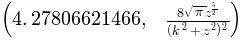

In [4]:
#Vamos a hacer la integral "mal" y compararla con la integral indiscutiblemente
#correcta, como curiosidad vamos a ver ademas el tiempo que tarda en devolver
#esta integral, fijense lo que pasa si primero integran en r y luego en \theta

tic=time.clock()
T_1s_mal=integrate(2*pi/sqrt(4*pi)*R1s*r**2*sin(theta)*exp(-I*k*r*cos(theta)),
                   (theta,0,pi),(r,0,oo))

time.clock()-tic,factor(simplify(T_1s_mal))


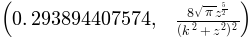

In [5]:
#Ahora la otra integral, el la salida se puede simplificar para que quede bien
tic=time.clock()
T_1s_bien=integrate(R1s*r**2*j0,(r,0,oo))
toc=time.clock()
toc-tic,simplify(4*pi/sqrt(4*pi)*T_1s_bien)

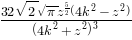

In [6]:
#Vamos con la 2s 
T_2s=integrate(R2s*r**2*j0,(r,0,oo))
simplify(4*pi/sqrt(4*pi)*T_2s)

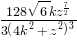

In [7]:
#con el 2p, solo la parte radial, queda multiplicar por Y^1_0(\hat{k}) que 
#junto con el k que queda en el numerador forma el producto 
#escalar de k con el versor z

T_2p=integrate(R2p*r*r*j1,(r,0,oo))
factor(simplify(T_2p))



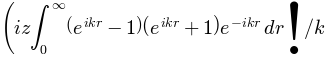

In [8]:
#Vamos a ver ahora las dificultades con la transformada del potencial:
# primero con la forma "incorrecta"
integrate(V*r*r*sin(theta)*exp(-I*k*r*cos(theta)),(theta,0,pi),(r,0,oo))
#No se por que no dice que no converge, devuelve esta expresion

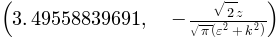

In [9]:
#Vamos con el Yukawa
tic=time.clock()
T_V=integrate(2*pi*V*r*r*exp(-epsilon*r)*sin(theta)*exp(-I*r*k*cos(theta))/
              sqrt(2*pi)**3,(theta,0,pi),(r,0,oo))
toc=time.clock()

toc-tic,simplify(T_V)

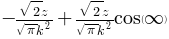

In [10]:
#Esto es usando la Bessel, aparece un termino dudoso, pero no es el potencial
#de Yukawa
integrate(4*pi*V*r*r*j0/sqrt(2*pi)**3,(r,0,oo))

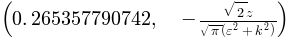

In [11]:
#Ahora la integral del Yukawa, usando las esfericas de Bessel
tic=time.clock()
T_V_b=integrate(4*pi*V*exp(-epsilon*r)*r*r*j0/sqrt(2*pi)**3,(r,0,oo))
toc=time.clock()
toc-tic,simplify(T_V_b)

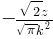

In [12]:
#Ahora que podemos transformar fourier, vamos a tratar con la convolución
Transf_V=limit(simplify(T_V_b),epsilon,0)
Transf_V

In [ ]:
#Vamos a calcular la convolución: Luego de 5 minutos devuelve:
#Integrando primero en theta:
#Don't know how to calculate the mrv of 
#'Integral(t*log(-k/(2*t) - 1 - t/(2*k))/(t**2 + z**2), t)'

#Integrando primero en t.... me aburri antes de que terminara.
integrate(sqrt(z)**5/(t**2+z**2)*z/(k*k+t*t-2*k*t*cos(theta))*t*t*sin(theta),
          (theta,0,pi),(t,0,oo))

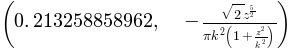

In [15]:
#Vamos a usar la forma razonble, vamos a hacer la transformada de 
#producto de una, usando las funciones j,Vamos a poner TODOS los factos 
#que corresponden y no los simplifico a mano para recordar de donde viene cada pi
tic=time.clock()
T_producto_1s=integrate(4*pi*V*R1s/sqrt(4*pi)*r*r*j0/sqrt(2*pi)**3,(r,0,oo))
time.clock()-tic,T_producto_1s

In [16]:
#Transformamos fourier la 1s con TODOS los factores que corresponden
T_1s=integrate(4*pi*R1s/sqrt(4*pi)*r*r*j0/sqrt(2*pi)**3,(r,0,oo))

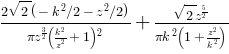

In [17]:
#Esto es la ecuación de schrodiger en el espacio de momentos 
#(recordar que la energia vale en este caso -z*z/2)

T_1s*(-z*z/2-k*k/2)-T_producto_1s

In [18]:
#Le pido que la factorize para poder ver que es lo que es eso.
factor(T_1s*(-z*z/2-k*k/2)-T_producto_1s)

In [19]:

#Vamos a repetir lo mismo con las funciones 2s y 2p(la energia vale -z*z/8)
T_2s=integrate(4*pi*R2s/sqrt(4*pi)*r*r*j0/sqrt(2*pi)**3,(r,0,oo))
T_producto_2s=integrate(4*pi*V*R2s/sqrt(4*pi)*r*r*j0/sqrt(2*pi)**3,(r,0,oo))

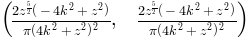

In [20]:
simplify(T_producto_2s),simplify(simplify(T_2s)*(-z*z/8-k*k/2))

In [21]:
#Aca hay que tener en cuenta el Y^1_1(r versor) pero como en los dos lados 
#sale para afuera como Y^1_1(k versor) y se simplifican la parte que queda es....
#(Ya simplificando todos los factores de ambos lados)

T_2p=integrate(R2p*r*r*j1,(r,0,oo))
T_producto_2p=integrate(V*R2p*r*r*j1,(r,0,oo))

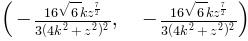

In [22]:
simplify(T_producto_2p),simplify(simplify(T_2p)*(-z*z/8-k*k/2))